In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

### This is a table of Premier league players for season 2022/23 for shooting and goals

In [2]:
df=pd.read_csv("FPL/Book3.csv")
df

Unnamed: 0           Unnamed: 1 Unnamed: 2 Unnamed: 3    Unnamed: 4  \
0           Rk               Player     Nation        Pos         Squad   
1            1     Brenden Aaronson     us USA      MF,FW  Leeds United   
2            2        George Abbott    eng ENG         MF     Tottenham   
3            3            Che Adams    sct SCO         FW   Southampton   
4            4          Tyler Adams     us USA         MF  Leeds United   
..         ...                  ...        ...        ...           ...   
587        565        Jordan Zemura     zw ZIM         DF   Bournemouth   
588        566  Oleksandr Zinchenko     ua UKR         DF       Arsenal   
589        567         Hakim Ziyech     ma MAR      FW,MF       Chelsea   
590        568           Kurt Zouma     fr FRA         DF      West Ham   
591        569      Martin Ødegaard     no NOR         MF       Arsenal   

    Unnamed: 5 Unnamed: 6 Unnamed: 7 Standard Unnamed: 9  ... Unnamed: 16  \
0          Age       Born        90s      Gls         Sh  ...        Dist   
1           21       2000       26.4        1         41  ...        18.4   
2           16       2005          0        0          0  ...         NaN   
3           26       1996       22.1        5         47  ...        13.8   
4           23       1999         24        0          4  ...        27.5   
..         ...        ...        ...      ...        ...  ...         ...   
587         22       1999       16.2        0          4  ...        12.9   
588         25       1996       23.5        1         28  ...        22.7   
589         29       1993        7.3        0         16  ...        22.7   
590         27       1994       22.1        2         19  ...        10.1   
591         23       1998       34.7       15         93  ...        19.2   

    Unnamed: 17 Unnamed: 18 Unnamed: 19 Expected Unnamed: 21 Unnamed: 22  \
0            FK          PK       PKatt       xG        npxG     npxG/Sh   
1             2           0           0      3.9         3.9        0.09   
2             0           0           0        0           0         NaN   
3             0           0           0      6.7         6.7        0.14   
4             0           0           0      0.1         0.1        0.03   
..          ...         ...         ...      ...         ...         ...   
587           0           0           0      0.4         0.4         0.1   
588           0           0           0      1.4         1.4        0.05   
589           0           0           0      0.6         0.6        0.04   
590           0           0           0      2.2         2.2        0.12   
591           9           0           0       10          10        0.11   

    Unnamed: 23 Unnamed: 24 Unnamed: 25  
0          G-xG     np:G-xG     Matches  
1          -2.9        -2.9     Matches  
2             0           0     Matches  
3          -1.7        -1.7     Matches  
4          -0.1        -0.1     Matches  
..          ...         ...         ...  
587        -0.4        -0.4     Matches  
588        -0.4        -0.4     Matches  
589        -0.6        -0.6     Matches  
590        -0.2        -0.2     Matches  
591           5           5     Matches  

[592 rows x 26 columns]

### We will make the first row the name of columns 

In [3]:
df.columns = df.iloc[0]


df = df[1:].reset_index(drop=True)

In [4]:
df.head()

0 Rk            Player   Nation    Pos         Squad Age  Born   90s Gls  Sh  \
0  1  Brenden Aaronson   us USA  MF,FW  Leeds United  21  2000  26.4   1  41   
1  2     George Abbott  eng ENG     MF     Tottenham  16  2005     0   0   0   
2  3         Che Adams  sct SCO     FW   Southampton  26  1996  22.1   5  47   
3  4       Tyler Adams   us USA     MF  Leeds United  23  1999    24   0   4   
4  5  Tosin Adarabioyo  eng ENG     DF        Fulham  24  1997  23.2   1  16   

0  ...  Dist FK PK PKatt   xG npxG npxG/Sh  G-xG np:G-xG  Matches  
0  ...  18.4  2  0     0  3.9  3.9    0.09  -2.9    -2.9  Matches  
1  ...   NaN  0  0     0    0    0     NaN     0       0  Matches  
2  ...  13.8  0  0     0  6.7  6.7    0.14  -1.7    -1.7  Matches  
3  ...  27.5  0  0     0  0.1  0.1    0.03  -0.1    -0.1  Matches  
4  ...  21.2  1  0     0  0.7  0.7    0.04   0.3     0.3  Matches  

[5 rows x 26 columns]

### Drop the first column Rk and matches

In [5]:
df.drop(["Rk","Matches"],inplace=True,axis=1)

In [6]:
df.head()

0            Player   Nation    Pos         Squad Age  Born   90s Gls  Sh SoT  \
0  Brenden Aaronson   us USA  MF,FW  Leeds United  21  2000  26.4   1  41   9   
1     George Abbott  eng ENG     MF     Tottenham  16  2005     0   0   0   0   
2         Che Adams  sct SCO     FW   Southampton  26  1996  22.1   5  47  14   
3       Tyler Adams   us USA     MF  Leeds United  23  1999    24   0   4   0   
4  Tosin Adarabioyo  eng ENG     DF        Fulham  24  1997  23.2   1  16   4   

0  ... G/SoT  Dist FK PK PKatt   xG npxG npxG/Sh  G-xG np:G-xG  
0  ...  0.11  18.4  2  0     0  3.9  3.9    0.09  -2.9    -2.9  
1  ...   NaN   NaN  0  0     0    0    0     NaN     0       0  
2  ...  0.36  13.8  0  0     0  6.7  6.7    0.14  -1.7    -1.7  
3  ...   NaN  27.5  0  0     0  0.1  0.1    0.03  -0.1    -0.1  
4  ...  0.25  21.2  1  0     0  0.7  0.7    0.04   0.3     0.3  

[5 rows x 24 columns]

In [7]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'],
      dtype='object', name=0)

In [8]:
df.iloc[1]

0
Player     George Abbott
Nation           eng ENG
Pos                   MF
Squad          Tottenham
Age                   16
Born                2005
90s                    0
Gls                    0
Sh                     0
SoT                    0
SoT%                 NaN
Sh/90                  0
SoT/90                 0
G/Sh                 NaN
G/SoT                NaN
Dist                 NaN
FK                     0
PK                     0
PKatt                  0
xG                     0
npxG                   0
npxG/Sh              NaN
G-xG                   0
np:G-xG                0
Name: 1, dtype: object

Change the Nan to 0 values

In [9]:
df.fillna(0,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   591 non-null    object
 1   Nation   591 non-null    object
 2   Pos      591 non-null    object
 3   Squad    591 non-null    object
 4   Age      591 non-null    object
 5   Born     591 non-null    object
 6   90s      591 non-null    object
 7   Gls      591 non-null    object
 8   Sh       591 non-null    object
 9   SoT      591 non-null    object
 10  SoT%     591 non-null    object
 11  Sh/90    591 non-null    object
 12  SoT/90   591 non-null    object
 13  G/Sh     591 non-null    object
 14  G/SoT    591 non-null    object
 15  Dist     591 non-null    object
 16  FK       591 non-null    object
 17  PK       591 non-null    object
 18  PKatt    591 non-null    object
 19  xG       591 non-null    object
 20  npxG     591 non-null    object
 21  npxG/Sh  591 non-null    object
 22  G-

In [11]:
df["Pos"].value_counts()

Pos
DF       175
MF       122
FW        86
FW,MF     67
MF,FW     49
GK        39
Pos       22
DF,MF     15
MF,DF      6
FW,DF      5
DF,FW      5
Name: count, dtype: int64

We found that one of the values is "Pos" so we need to ajust the values

In [12]:
rows_with_pos = df[df.isin(['Pos']).any(axis=1)]
rows_with_pos
df.drop(rows_with_pos.index, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 590
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   569 non-null    object
 1   Nation   569 non-null    object
 2   Pos      569 non-null    object
 3   Squad    569 non-null    object
 4   Age      569 non-null    object
 5   Born     569 non-null    object
 6   90s      569 non-null    object
 7   Gls      569 non-null    object
 8   Sh       569 non-null    object
 9   SoT      569 non-null    object
 10  SoT%     569 non-null    object
 11  Sh/90    569 non-null    object
 12  SoT/90   569 non-null    object
 13  G/Sh     569 non-null    object
 14  G/SoT    569 non-null    object
 15  Dist     569 non-null    object
 16  FK       569 non-null    object
 17  PK       569 non-null    object
 18  PKatt    569 non-null    object
 19  xG       569 non-null    object
 20  npxG     569 non-null    object
 21  npxG/Sh  569 non-null    object
 22  G-xG   

Check the Null values

In [14]:
df.isnull().sum()

0
Player     0
Nation     0
Pos        0
Squad      0
Age        0
Born       0
90s        0
Gls        0
Sh         0
SoT        0
SoT%       0
Sh/90      0
SoT/90     0
G/Sh       0
G/SoT      0
Dist       0
FK         0
PK         0
PKatt      0
xG         0
npxG       0
npxG/Sh    0
G-xG       0
np:G-xG    0
dtype: int64

In [15]:
df["Age"].value_counts()

Age
25    60
24    49
22    45
23    42
29    40
26    39
30    38
27    38
28    33
21    30
20    27
32    22
19    21
31    21
18    18
17    12
33    10
35     7
34     6
16     5
37     4
36     1
15     1
Name: count, dtype: int64

All the values are classified as object so we need to change them to numeric class if they are numbers

In [16]:
for col in df.columns:
    df[col]=pd.to_numeric(df[col],errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 590
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   569 non-null    object 
 1   Nation   569 non-null    object 
 2   Pos      569 non-null    object 
 3   Squad    569 non-null    object 
 4   Age      569 non-null    int64  
 5   Born     569 non-null    int64  
 6   90s      569 non-null    float64
 7   Gls      569 non-null    int64  
 8   Sh       569 non-null    int64  
 9   SoT      569 non-null    int64  
 10  SoT%     569 non-null    float64
 11  Sh/90    569 non-null    float64
 12  SoT/90   569 non-null    float64
 13  G/Sh     569 non-null    float64
 14  G/SoT    569 non-null    float64
 15  Dist     569 non-null    float64
 16  FK       569 non-null    int64  
 17  PK       569 non-null    int64  
 18  PKatt    569 non-null    int64  
 19  xG       569 non-null    float64
 20  npxG     569 non-null    float64
 21  npxG/Sh  569 non-null

In [17]:
df.groupby("Squad")["Gls"].sum().sort_values(ascending=False).reset_index()

Squad  Gls
0   Manchester City   92
1           Arsenal   84
2         Liverpool   71
3         Tottenham   68
4          Brighton   68
5     Newcastle Utd   64
6         Brentford   56
7    Manchester Utd   56
8            Fulham   52
9       Aston Villa   49
10   Leicester City   49
11     Leeds United   45
12         West Ham   41
13   Crystal Palace   38
14          Chelsea   37
15      Bournemouth   37
16  Nott'ham Forest   36
17      Southampton   36
18          Everton   32
19           Wolves   28

In [18]:
df1=pd.read_csv("FPL/Book1.csv")

In [19]:
df1.columns = df1.iloc[0]


df1= df1[1:].reset_index(drop=True)
df1

0     Rk               Player   Nation    Pos         Squad Age  Born   90s  \
0      1     Brenden Aaronson   us USA  MF,FW  Leeds United  21  2000  26.4   
1      2        George Abbott  eng ENG     MF     Tottenham  16  2005     0   
2      3            Che Adams  sct SCO     FW   Southampton  26  1996  22.1   
3      4          Tyler Adams   us USA     MF  Leeds United  23  1999    24   
4      5     Tosin Adarabioyo  eng ENG     DF        Fulham  24  1997  23.2   
..   ...                  ...      ...    ...           ...  ..   ...   ...   
586  565        Jordan Zemura   zw ZIM     DF   Bournemouth  22  1999  16.2   
587  566  Oleksandr Zinchenko   ua UKR     DF       Arsenal  25  1996  23.5   
588  567         Hakim Ziyech   ma MAR  FW,MF       Chelsea  29  1993   7.3   
589  568           Kurt Zouma   fr FRA     DF      West Ham  27  1994  22.1   
590  569      Martin Ødegaard   no NOR     MF       Arsenal  23  1998  34.7   

0     Cmp   Att  ... Ast  xAG   xA A-xAG  KP 3-Jan PPA CrsPA PrgP  Matches  
0     592   797  ...   3  4.2  2.6  -1.2  46    47  16     4   86  Matches  
1       1     1  ...   0    0    0     0   0     0   0     0    0  Matches  
2     330   498  ...   3  2.8  2.2   0.2  24    21  11     2   34  Matches  
3    1108  1343  ...   0  1.4    1  -1.4  24   110  13     0  136  Matches  
4    1066  1300  ...   0  0.4  0.5  -0.4   6    96   7     0   95  Matches  
..    ...   ...  ...  ..  ...  ...   ...  ..   ...  ..   ...  ...      ...  
586   423   594  ...   1  1.9  2.1  -0.9  18    32  12     5   45  Matches  
587  1652  1911  ...   2  1.4  2.4   0.6  19   201  41     4  227  Matches  
588   258   400  ...   3  2.2  1.5   0.8  14    20  19     7   42  Matches  
589   701   831  ...   0  0.1  0.1  -0.1   1    19   2     0   31  Matches  
590  1449  1804  ...   7  8.1  7.9  -1.1  76   135  91     4  266  Matches  

[591 rows x 32 columns]

In [20]:
df1["3/1"]=df1['3-Jan']


In [21]:
df1.drop("3-Jan",axis=1,inplace=True)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rk           591 non-null    object
 1   Player       591 non-null    object
 2   Nation       591 non-null    object
 3   Pos          591 non-null    object
 4   Squad        591 non-null    object
 5   Age          591 non-null    object
 6   Born         591 non-null    object
 7   90s          591 non-null    object
 8   Cmp          591 non-null    object
 9   Att          591 non-null    object
 10  Cmp%         587 non-null    object
 11  TotDist      591 non-null    object
 12  PrgDist      591 non-null    object
 13  Cmp_Short    591 non-null    object
 14  Att_Short    591 non-null    object
 15  Cmp_Short    583 non-null    object
 16  Cmp_Medium   591 non-null    object
 17  Att_Medium   591 non-null    object
 18  Cmp%_Medium  577 non-null    object
 19  Cmp_Long     591 non-null    

In [23]:
df1["Age"].value_counts()

Age
25     60
24     49
22     45
23     42
29     40
26     39
30     38
27     38
28     33
21     30
20     27
Age    22
32     22
19     21
31     21
18     18
17     12
33     10
35      7
34      6
16      5
37      4
36      1
15      1
Name: count, dtype: int64

In [24]:
rows_with_pos = df1[df1.isin(['Pos']).any(axis=1)]
rows_with_pos
df1.drop(rows_with_pos.index, inplace=True)

In [25]:
df1.fillna(0,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 590
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   569 non-null    object 
 1   Nation   569 non-null    object 
 2   Pos      569 non-null    object 
 3   Squad    569 non-null    object 
 4   Age      569 non-null    int64  
 5   Born     569 non-null    int64  
 6   90s      569 non-null    float64
 7   Gls      569 non-null    int64  
 8   Sh       569 non-null    int64  
 9   SoT      569 non-null    int64  
 10  SoT%     569 non-null    float64
 11  Sh/90    569 non-null    float64
 12  SoT/90   569 non-null    float64
 13  G/Sh     569 non-null    float64
 14  G/SoT    569 non-null    float64
 15  Dist     569 non-null    float64
 16  FK       569 non-null    int64  
 17  PK       569 non-null    int64  
 18  PKatt    569 non-null    int64  
 19  xG       569 non-null    float64
 20  npxG     569 non-null    float64
 21  npxG/Sh  569 non-null

In [27]:
df1.drop("Matches",inplace=True,axis=1)

In [28]:
df1['Born']=pd.to_numeric(df1["Born"],errors='ignore')

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 590
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rk           569 non-null    object
 1   Player       569 non-null    object
 2   Nation       569 non-null    object
 3   Pos          569 non-null    object
 4   Squad        569 non-null    object
 5   Age          569 non-null    object
 6   Born         569 non-null    int64 
 7   90s          569 non-null    object
 8   Cmp          569 non-null    object
 9   Att          569 non-null    object
 10  Cmp%         569 non-null    object
 11  TotDist      569 non-null    object
 12  PrgDist      569 non-null    object
 13  Cmp_Short    569 non-null    object
 14  Att_Short    569 non-null    object
 15  Cmp_Short    569 non-null    object
 16  Cmp_Medium   569 non-null    object
 17  Att_Medium   569 non-null    object
 18  Cmp%_Medium  569 non-null    object
 19  Cmp_Long     569 non-null    objec

In [30]:
df1.columns.values[15] = "Cmp%_Short"


In [31]:
for col in df1.columns:
    df1[col]=pd.to_numeric(df1[col],errors='ignore')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 590
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           569 non-null    int64  
 1   Player       569 non-null    object 
 2   Nation       569 non-null    object 
 3   Pos          569 non-null    object 
 4   Squad        569 non-null    object 
 5   Age          569 non-null    int64  
 6   Born         569 non-null    int64  
 7   90s          569 non-null    float64
 8   Cmp          569 non-null    int64  
 9   Att          569 non-null    int64  
 10  Cmp%         569 non-null    float64
 11  TotDist      569 non-null    int64  
 12  PrgDist      569 non-null    int64  
 13  Cmp_Short    569 non-null    int64  
 14  Att_Short    569 non-null    int64  
 15  Cmp%_Short   569 non-null    float64
 16  Cmp_Medium   569 non-null    int64  
 17  Att_Medium   569 non-null    int64  
 18  Cmp%_Medium  569 non-null    float64
 19  Cmp_Long     

In [32]:
df1.drop(['Rk','Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s'],inplace=True,axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 590
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cmp          569 non-null    int64  
 1   Att          569 non-null    int64  
 2   Cmp%         569 non-null    float64
 3   TotDist      569 non-null    int64  
 4   PrgDist      569 non-null    int64  
 5   Cmp_Short    569 non-null    int64  
 6   Att_Short    569 non-null    int64  
 7   Cmp%_Short   569 non-null    float64
 8   Cmp_Medium   569 non-null    int64  
 9   Att_Medium   569 non-null    int64  
 10  Cmp%_Medium  569 non-null    float64
 11  Cmp_Long     569 non-null    int64  
 12  Att_Long     569 non-null    int64  
 13  Cmp%_Long    569 non-null    float64
 14  Ast          569 non-null    int64  
 15  xAG          569 non-null    float64
 16  xA           569 non-null    float64
 17  A-xAG        569 non-null    float64
 18  KP           569 non-null    int64  
 19  PPA          

In [33]:
df=pd.concat([df,df1],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 590
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       569 non-null    object 
 1   Nation       569 non-null    object 
 2   Pos          569 non-null    object 
 3   Squad        569 non-null    object 
 4   Age          569 non-null    int64  
 5   Born         569 non-null    int64  
 6   90s          569 non-null    float64
 7   Gls          569 non-null    int64  
 8   Sh           569 non-null    int64  
 9   SoT          569 non-null    int64  
 10  SoT%         569 non-null    float64
 11  Sh/90        569 non-null    float64
 12  SoT/90       569 non-null    float64
 13  G/Sh         569 non-null    float64
 14  G/SoT        569 non-null    float64
 15  Dist         569 non-null    float64
 16  FK           569 non-null    int64  
 17  PK           569 non-null    int64  
 18  PKatt        569 non-null    int64  
 19  xG           

In [34]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Cmp', 'Att',
       'Cmp%', 'TotDist', 'PrgDist', 'Cmp_Short', 'Att_Short', 'Cmp%_Short',
       'Cmp_Medium', 'Att_Medium', 'Cmp%_Medium', 'Cmp_Long', 'Att_Long',
       'Cmp%_Long', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', 'PPA', 'CrsPA', 'PrgP',
       '3/1'],
      dtype='object', name=0)

In [35]:
fig=px.histogram(df.sort_values(by="Gls",ascending=False),x="Squad",y="Gls",color="Player",height=1000)

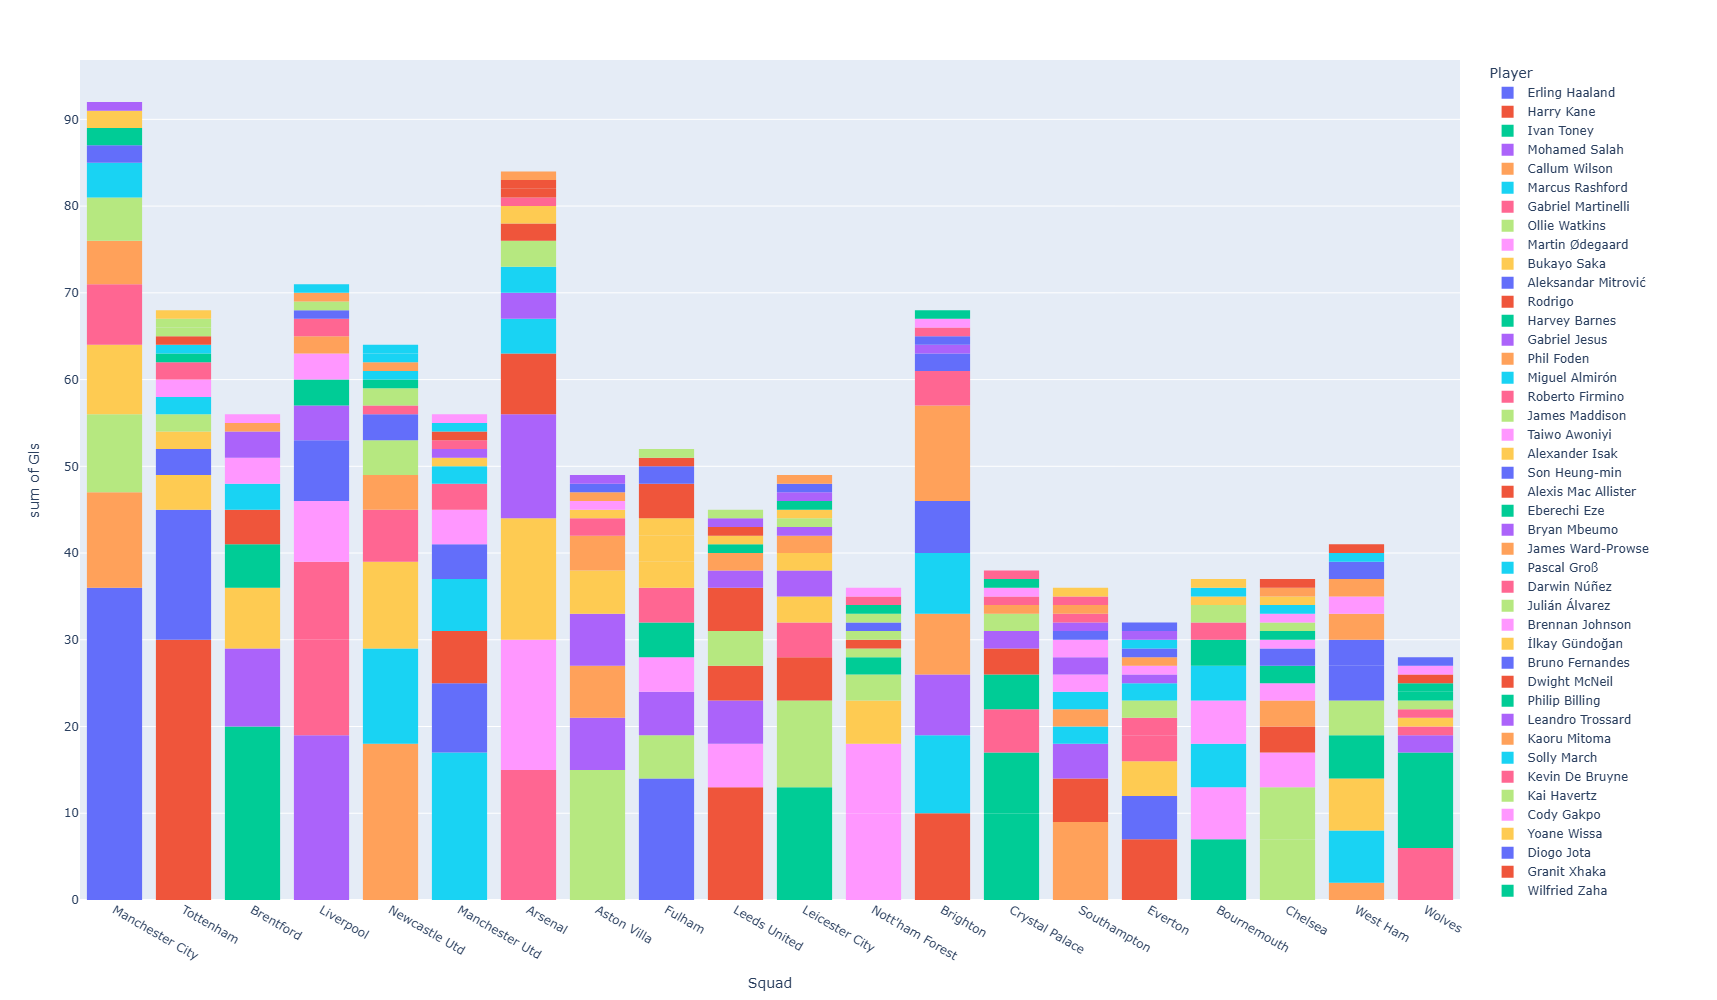

In [36]:
fig

In [37]:
fig=px.histogram(df.sort_values(by="Gls",ascending=False),x="Squad",y="Gls",color="Player",height=1000)

In [38]:
fig=px.histogram(df.sort_values(by="Gls",ascending=False),x="Squad",y="Gls",height=1000,text_auto=True)

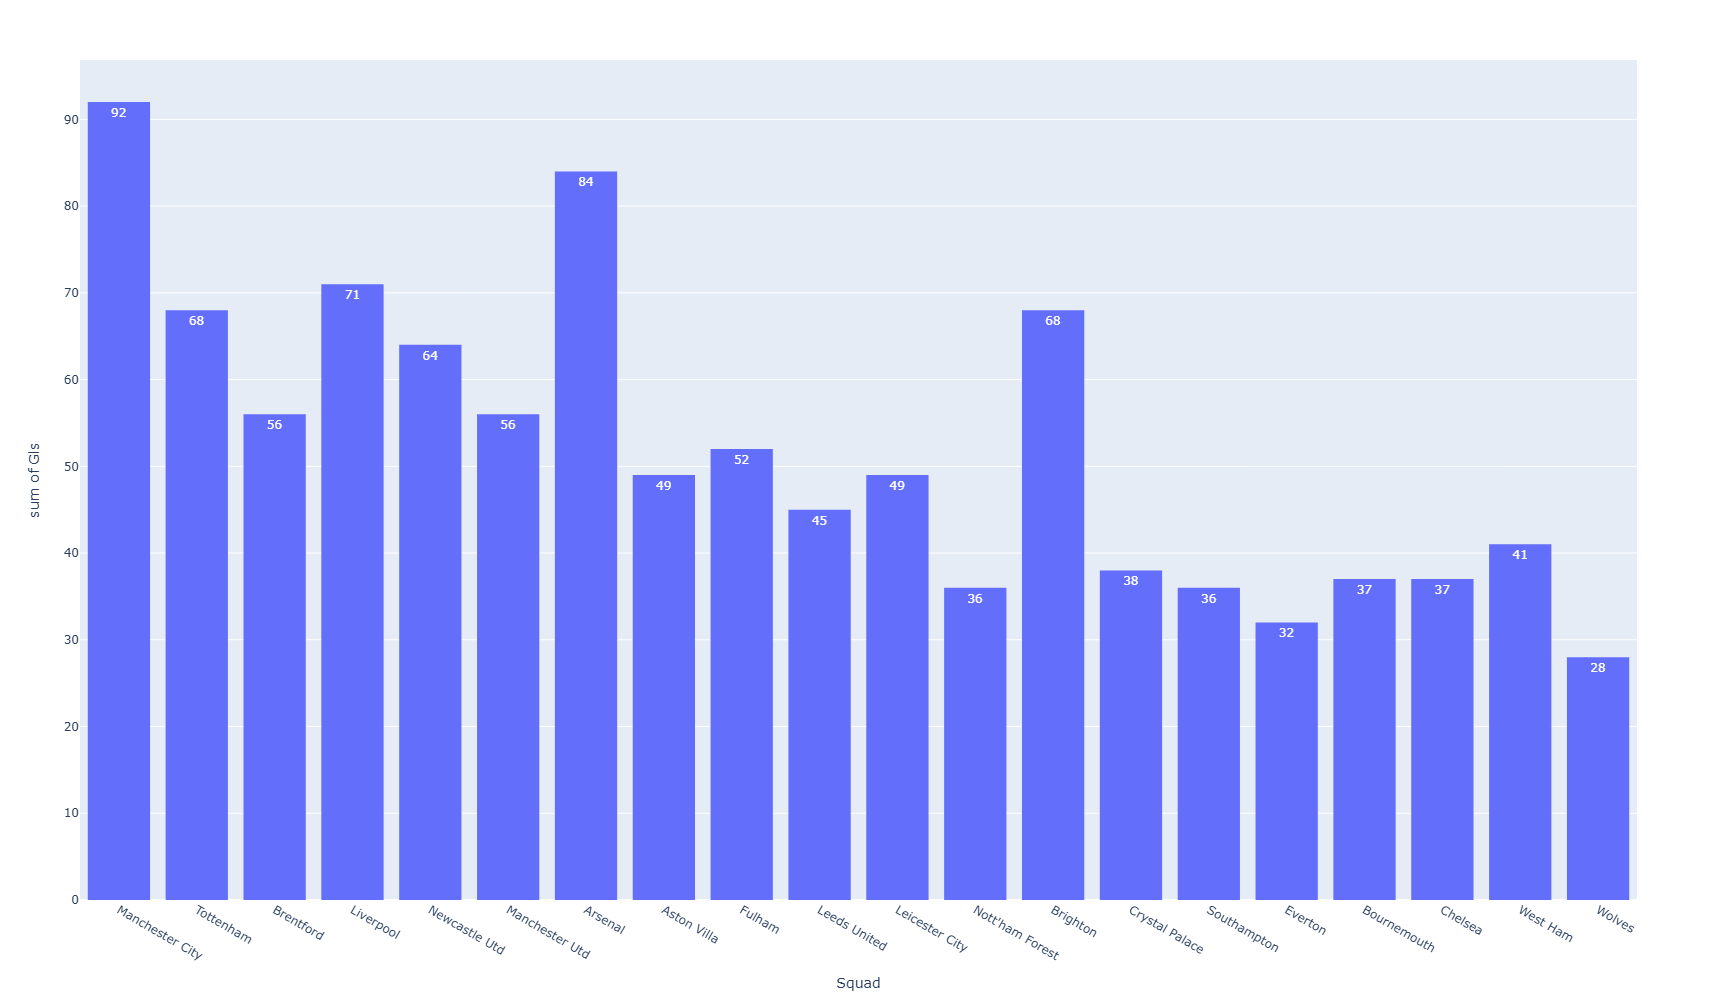

In [39]:
fig

In [40]:
x=df.groupby("Squad")['Gls'].sum().sort_values(ascending=False).reset_index()

In [41]:
x.head()

Squad  Gls
0  Manchester City   92
1          Arsenal   84
2        Liverpool   71
3        Tottenham   68
4         Brighton   68

In [42]:
x=(df.groupby("Squad")["Gls"].sum()/38).round(2).sort_values(ascending=False).reset_index()

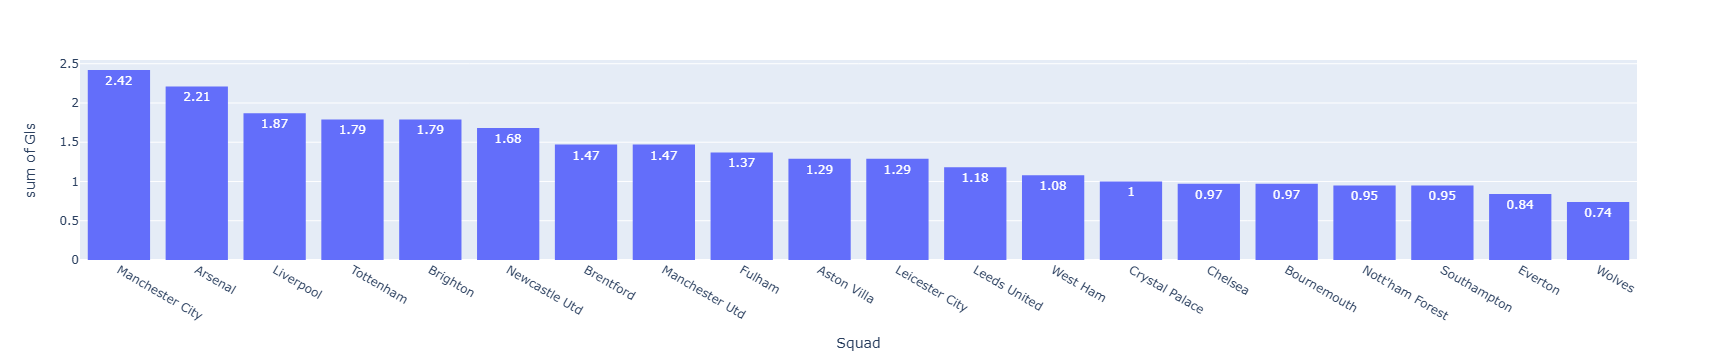

In [43]:
px.histogram(data_frame=x,x="Squad",y="Gls",text_auto=True)

In [44]:
x=df.groupby("Squad")["xG"].sum().sort_values(ascending=False).reset_index()

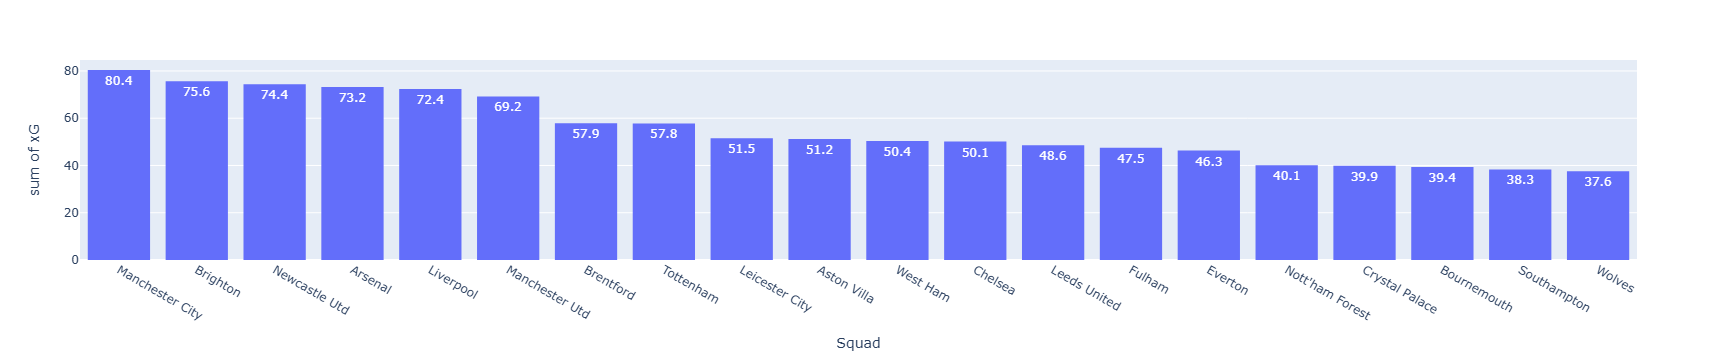

In [45]:
px.histogram(data_frame=x,x="Squad",y="xG",text_auto=True)


In [46]:
df.groupby("Player")["xG"].sum().sort_values(ascending=False).reset_index().head(20)

Player    xG
0        Erling Haaland  28.4
1         Mohamed Salah  21.6
2            Harry Kane  21.4
3            Ivan Toney  18.7
4         Callum Wilson  17.4
5         Ollie Watkins  16.5
6       Marcus Rashford  15.4
7   Aleksandar Mitrović  14.9
8         Gabriel Jesus  14.0
9   Alexis Mac Allister  12.1
10          Kai Havertz  11.6
11         Darwin Núñez  11.6
12          Bukayo Saka  11.2
13        Son Heung-min  10.1
14      Martin Ødegaard  10.0
15         Bryan Mbeumo   9.6
16        Danny Welbeck   9.4
17      Bruno Fernandes   9.3
18      Dominic Solanke   9.1
19   Gabriel Martinelli   9.1

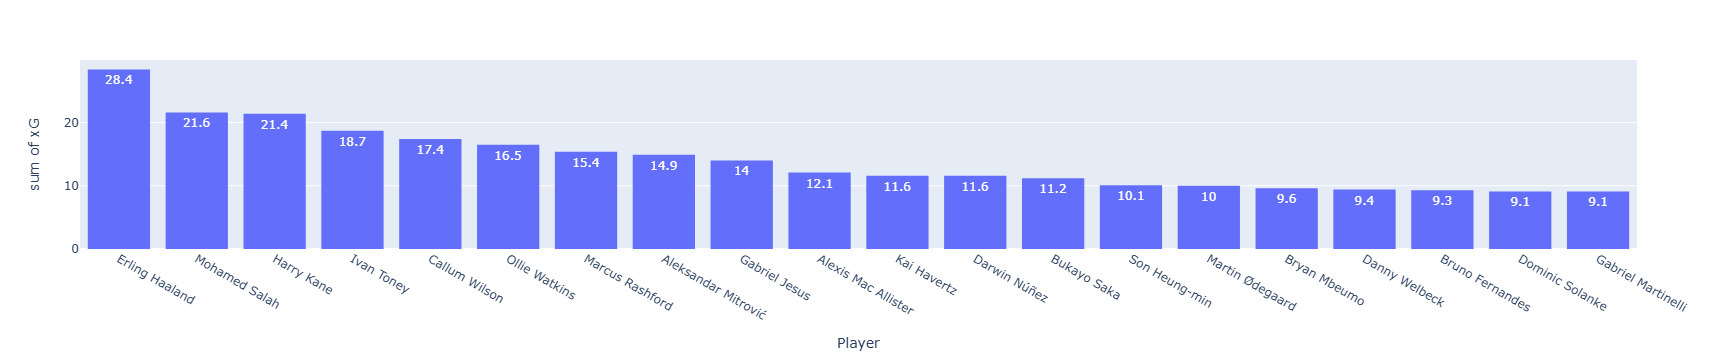

In [47]:
px.histogram(data_frame=df.groupby("Player")["xG"].sum().sort_values(ascending=False).reset_index().head(20),x="Player",y="xG",text_auto=True)

In [48]:
df.groupby("Player")["Gls"].sum().sort_values(ascending=False).reset_index().head(20)

Player  Gls
0        Erling Haaland   36
1            Harry Kane   30
2            Ivan Toney   20
3         Mohamed Salah   19
4         Callum Wilson   18
5       Marcus Rashford   17
6         Ollie Watkins   15
7    Gabriel Martinelli   15
8       Martin Ødegaard   15
9           Bukayo Saka   14
10  Aleksandar Mitrović   14
11        Harvey Barnes   13
12              Rodrigo   13
13        Gabriel Jesus   11
14      Roberto Firmino   11
15           Phil Foden   11
16       Miguel Almirón   11
17  Alexis Mac Allister   10
18       James Maddison   10
19        Taiwo Awoniyi   10

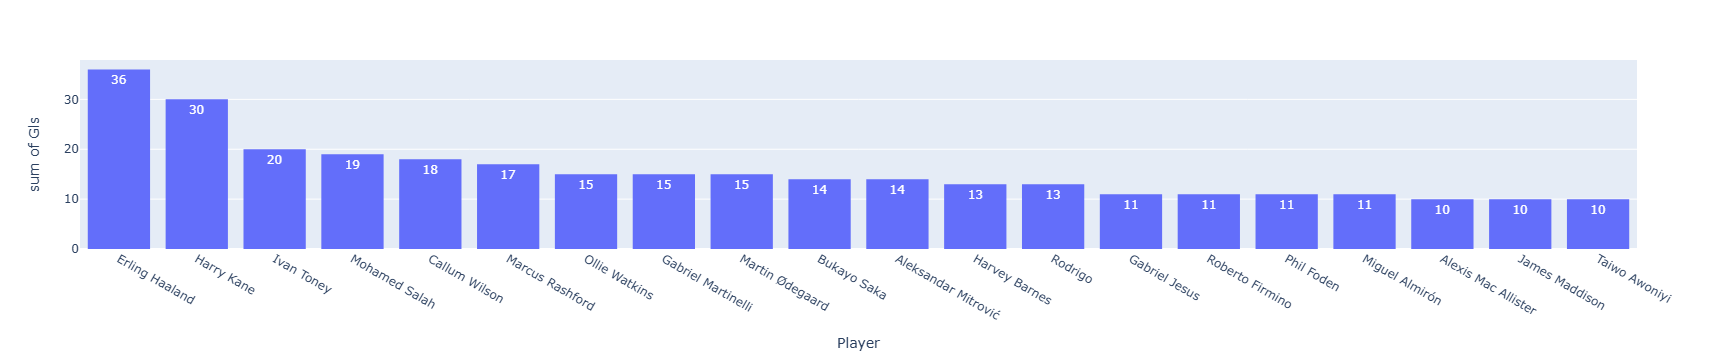

In [49]:
px.histogram(df.groupby("Player")["Gls"].sum().sort_values(ascending=False).reset_index().head(20),x="Player",y="Gls",text_auto=True)

In [50]:
df.loc[df["Player"]=="Martin Ødegaard"]
df.loc[590]

0
Player         Martin Ødegaard
Nation                  no NOR
Pos                         MF
Squad                  Arsenal
Age                         23
Born                      1998
90s                       34.7
Gls                         15
Sh                          93
SoT                         31
SoT%                      33.3
Sh/90                     2.68
SoT/90                    0.89
G/Sh                      0.16
G/SoT                     0.48
Dist                      19.2
FK                           9
PK                           0
PKatt                        0
xG                        10.0
npxG                      10.0
npxG/Sh                   0.11
G-xG                       5.0
np:G-xG                    5.0
Cmp                       1449
Att                       1804
Cmp%                      80.3
TotDist                  22540
PrgDist                   6014
Cmp_Short                  759
Att_Short                  873
Cmp%_Short                86.9
Cmp_Me

In [51]:
df[df["Player"]=="Emi Buendía"].index[0]

72

In [52]:
df.loc[df[df["Player"]=="Emi Buendía"].index[0]]

0
Player         Emi Buendía
Nation              ar ARG
Pos                  MF,FW
Squad          Aston Villa
Age                     25
Born                  1996
90s                   26.8
Gls                      5
Sh                      49
SoT                     11
SoT%                  22.4
Sh/90                 1.83
SoT/90                0.41
G/Sh                   0.1
G/SoT                 0.45
Dist                  15.9
FK                       2
PK                       0
PKatt                    0
xG                     6.3
npxG                   6.3
npxG/Sh               0.13
G-xG                  -1.3
np:G-xG               -1.3
Cmp                    787
Att                   1020
Cmp%                  77.2
TotDist              12082
PrgDist               3091
Cmp_Short              434
Att_Short              513
Cmp%_Short            84.6
Cmp_Medium             255
Att_Medium             323
Cmp%_Medium           78.9
Cmp_Long                63
Att_Long                90

In [53]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Cmp', 'Att',
       'Cmp%', 'TotDist', 'PrgDist', 'Cmp_Short', 'Att_Short', 'Cmp%_Short',
       'Cmp_Medium', 'Att_Medium', 'Cmp%_Medium', 'Cmp_Long', 'Att_Long',
       'Cmp%_Long', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', 'PPA', 'CrsPA', 'PrgP',
       '3/1'],
      dtype='object', name=0)

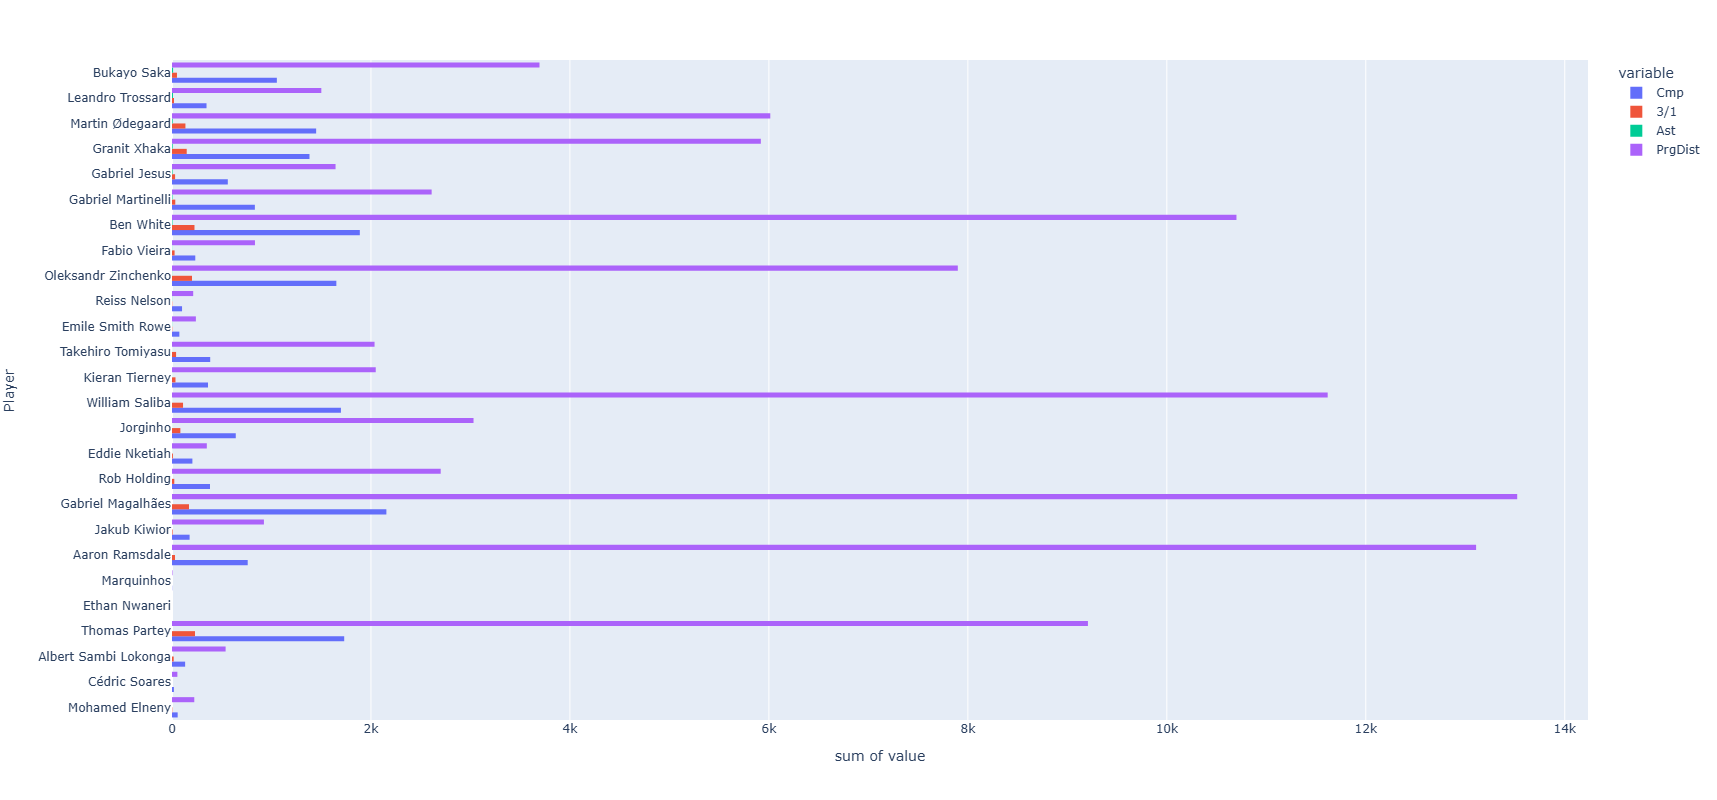

In [54]:
px.histogram(df[df["Squad"]=="Arsenal"].sort_values(by='Ast'),x=["Cmp","3/1",'Ast',"PrgDist"],y="Player",height=800,barmode="group")

In [55]:
df["Pos"].value_counts()

Pos
DF       175
MF       122
FW        86
FW,MF     67
MF,FW     49
GK        39
DF,MF     15
MF,DF      6
FW,DF      5
DF,FW      5
Name: count, dtype: int64

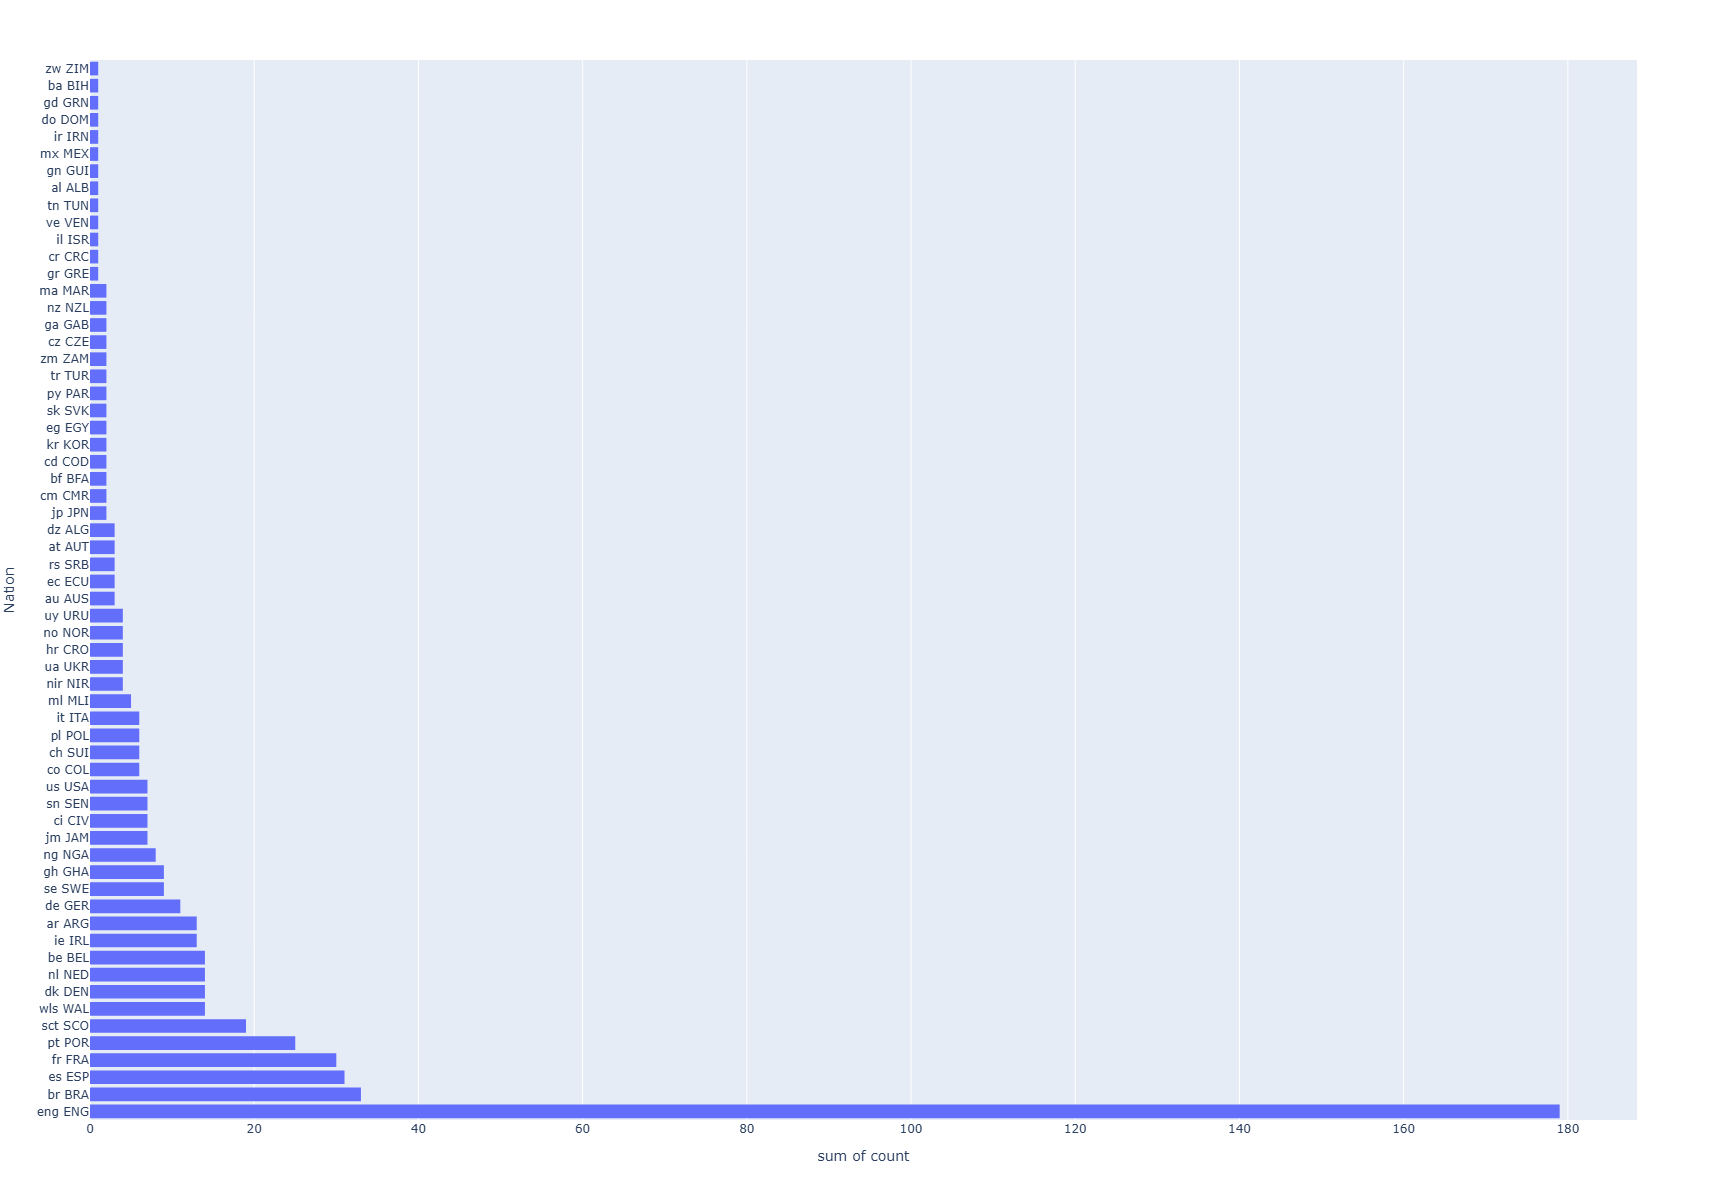

In [56]:
px.histogram(data_frame=df["Nation"].value_counts().reset_index(),x="count",y="Nation",height=1200)

In [57]:
df_Model=df.copy()

In [58]:
df_Model.reset_index(inplace=True,drop=True)

In [59]:
df_Model.head()

0            Player   Nation    Pos         Squad  Age  Born   90s  Gls  Sh  \
0  Brenden Aaronson   us USA  MF,FW  Leeds United   21  2000  26.4    1  41   
1     George Abbott  eng ENG     MF     Tottenham   16  2005   0.0    0   0   
2         Che Adams  sct SCO     FW   Southampton   26  1996  22.1    5  47   
3       Tyler Adams   us USA     MF  Leeds United   23  1999  24.0    0   4   
4  Tosin Adarabioyo  eng ENG     DF        Fulham   24  1997  23.2    1  16   

0  SoT  ...  Cmp%_Long  Ast  xAG   xA  A-xAG  KP  PPA  CrsPA  PrgP  3/1  
0    9  ...       38.5    3  4.2  2.6   -1.2  46   16      4    86   47  
1    0  ...        0.0    0  0.0  0.0    0.0   0    0      0     0    0  
2   14  ...       70.3    3  2.8  2.2    0.2  24   11      2    34   21  
3    0  ...       58.9    0  1.4  1.0   -1.4  24   13      0   136  110  
4    4  ...       61.0    0  0.4  0.5   -0.4   6    7      0    95   96  

[5 rows x 47 columns]

In [60]:
def fix_pos(x):
    if x=="FW,MF":
        return "FW"
    elif x=="MF,FW":
        return "MF"
    elif x=="DF,MF":
        return "DF"
    elif x=="MF,DF":
        return "MF"
    elif x=="FW,DF":
        return "FW"
    elif x=="DF,FW":
        return "DF"
    return x
    

In [61]:
df_Model["Pos"]=df_Model["Pos"].apply(fix_pos)

In [62]:
df_Model["Pos"].value_counts()

Pos
DF    195
MF    177
FW    158
GK     39
Name: count, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder 
Encoder = LabelEncoder()
df_Model["Squad_num"]=Encoder.fit_transform(df_Model["Squad"])
df_Model["Pos_num"]=Encoder.fit_transform(df_Model["Pos"])

In [64]:
df_Model.reset_index(inplace=True,drop=True)

In [65]:
df_Model["Pos_num"].value_counts()

Pos_num
0    195
3    177
1    158
2     39
Name: count, dtype: int64

In [66]:
df_Model["Pos"].value_counts()

Pos
DF    195
MF    177
FW    158
GK     39
Name: count, dtype: int64

In [67]:
df_Model.head()

0            Player   Nation Pos         Squad  Age  Born   90s  Gls  Sh  SoT  \
0  Brenden Aaronson   us USA  MF  Leeds United   21  2000  26.4    1  41    9   
1     George Abbott  eng ENG  MF     Tottenham   16  2005   0.0    0   0    0   
2         Che Adams  sct SCO  FW   Southampton   26  1996  22.1    5  47   14   
3       Tyler Adams   us USA  MF  Leeds United   23  1999  24.0    0   4    0   
4  Tosin Adarabioyo  eng ENG  DF        Fulham   24  1997  23.2    1  16    4   

0  ...  xAG   xA  A-xAG  KP  PPA  CrsPA  PrgP  3/1  Squad_num  Pos_num  
0  ...  4.2  2.6   -1.2  46   16      4    86   47          9        3  
1  ...  0.0  0.0    0.0   0    0      0     0    0         17        3  
2  ...  2.8  2.2    0.2  24   11      2    34   21         16        1  
3  ...  1.4  1.0   -1.4  24   13      0   136  110          9        3  
4  ...  0.4  0.5   -0.4   6    7      0    95   96          8        0  

[5 rows x 49 columns]

In [68]:
pd.set_option('display.max_columns', None)

In [69]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.metrics import accuracy_score  , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import  cross_validate
from sklearn.tree import DecisionTreeClassifier

In [70]:
df_Model

0                 Player   Nation Pos         Squad  Age  Born   90s  Gls  Sh  \
0       Brenden Aaronson   us USA  MF  Leeds United   21  2000  26.4    1  41   
1          George Abbott  eng ENG  MF     Tottenham   16  2005   0.0    0   0   
2              Che Adams  sct SCO  FW   Southampton   26  1996  22.1    5  47   
3            Tyler Adams   us USA  MF  Leeds United   23  1999  24.0    0   4   
4       Tosin Adarabioyo  eng ENG  DF        Fulham   24  1997  23.2    1  16   
..                   ...      ...  ..           ...  ...   ...   ...  ...  ..   
564        Jordan Zemura   zw ZIM  DF   Bournemouth   22  1999  16.2    0   4   
565  Oleksandr Zinchenko   ua UKR  DF       Arsenal   25  1996  23.5    1  28   
566         Hakim Ziyech   ma MAR  FW       Chelsea   29  1993   7.3    0  16   
567           Kurt Zouma   fr FRA  DF      West Ham   27  1994  22.1    2  19   
568      Martin Ødegaard   no NOR  MF       Arsenal   23  1998  34.7   15  93   

0    SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK  PKatt    xG  npxG  \
0      9  22.0   1.56    0.34  0.02   0.11  18.4   2   0      0   3.9   3.9   
1      0   0.0   0.00    0.00  0.00   0.00   0.0   0   0      0   0.0   0.0   
2     14  29.8   2.12    0.63  0.11   0.36  13.8   0   0      0   6.7   6.7   
3      0   0.0   0.17    0.00  0.00   0.00  27.5   0   0      0   0.1   0.1   
4      4  25.0   0.69    0.17  0.06   0.25  21.2   1   0      0   0.7   0.7   
..   ...   ...    ...     ...   ...    ...   ...  ..  ..    ...   ...   ...   
564    0   0.0   0.25    0.00  0.00   0.00  12.9   0   0      0   0.4   0.4   
565    7  25.0   1.19    0.30  0.04   0.14  22.7   0   0      0   1.4   1.4   
566    3  18.8   2.18    0.41  0.00   0.00  22.7   0   0      0   0.6   0.6   
567    5  26.3   0.86    0.23  0.11   0.40  10.1   0   0      0   2.2   2.2   
568   31  33.3   2.68    0.89  0.16   0.48  19.2   9   0      0  10.0  10.0   

0    npxG/Sh  G-xG  np:G-xG   Cmp   Att   Cmp%  TotDist  PrgDist  Cmp_Short  \
0       0.09  -2.9     -2.9   592   797   74.3     7577     2182        346   
1       0.00   0.0      0.0     1     1  100.0        8        0          1   
2       0.14  -1.7     -1.7   330   498   66.3     4651     1042        205   
3       0.03  -0.1     -0.1  1108  1343   82.5    16592     5061        607   
4       0.04   0.3      0.3  1066  1300   82.0    22623     8478        265   
..       ...   ...      ...   ...   ...    ...      ...      ...        ...   
564     0.10  -0.4     -0.4   423   594   71.2     6117     3247        242   
565     0.05  -0.4     -0.4  1652  1911   86.4    27023     7899        808   
566     0.04  -0.6     -0.6   258   400   64.5     4222     1570        148   
567     0.12  -0.2     -0.2   701   831   84.4    13480     4437        247   
568     0.11   5.0      5.0  1449  1804   80.3    22540     6014        759   

0    Att_Short  Cmp%_Short  Cmp_Medium  Att_Medium  Cmp%_Medium  Cmp_Long  \
0          423        81.8         150         195         76.9        25   
1            1       100.0           0           0          0.0         0   
2          278        73.7          78         118         66.1        26   
3          686        88.5         390         460         84.8        63   
4          307        86.3         653         735         88.8       136   
..         ...         ...         ...         ...          ...       ...   
564        284        85.2         133         187         71.1        23   
565        876        92.2         696         798         87.2       105   
566        169        87.6          82         133         61.7        24   
567        271        91.1         363         407         89.2        79   
568        873        86.9         518         617         84.0       110   

0    Att_Long  Cmp%_Long  Ast  xAG   xA  A-xAG  KP  PPA  CrsPA  PrgP  3/1  \
0          65       38.5    3  4.2  2.6   -1.2  46   16      4    86   47   
1           0        0.0    0  0.0  0.0    0.0   0

In [71]:
df1=df_Model.select_dtypes(exclude="object")

In [72]:
corr=df1.corr()

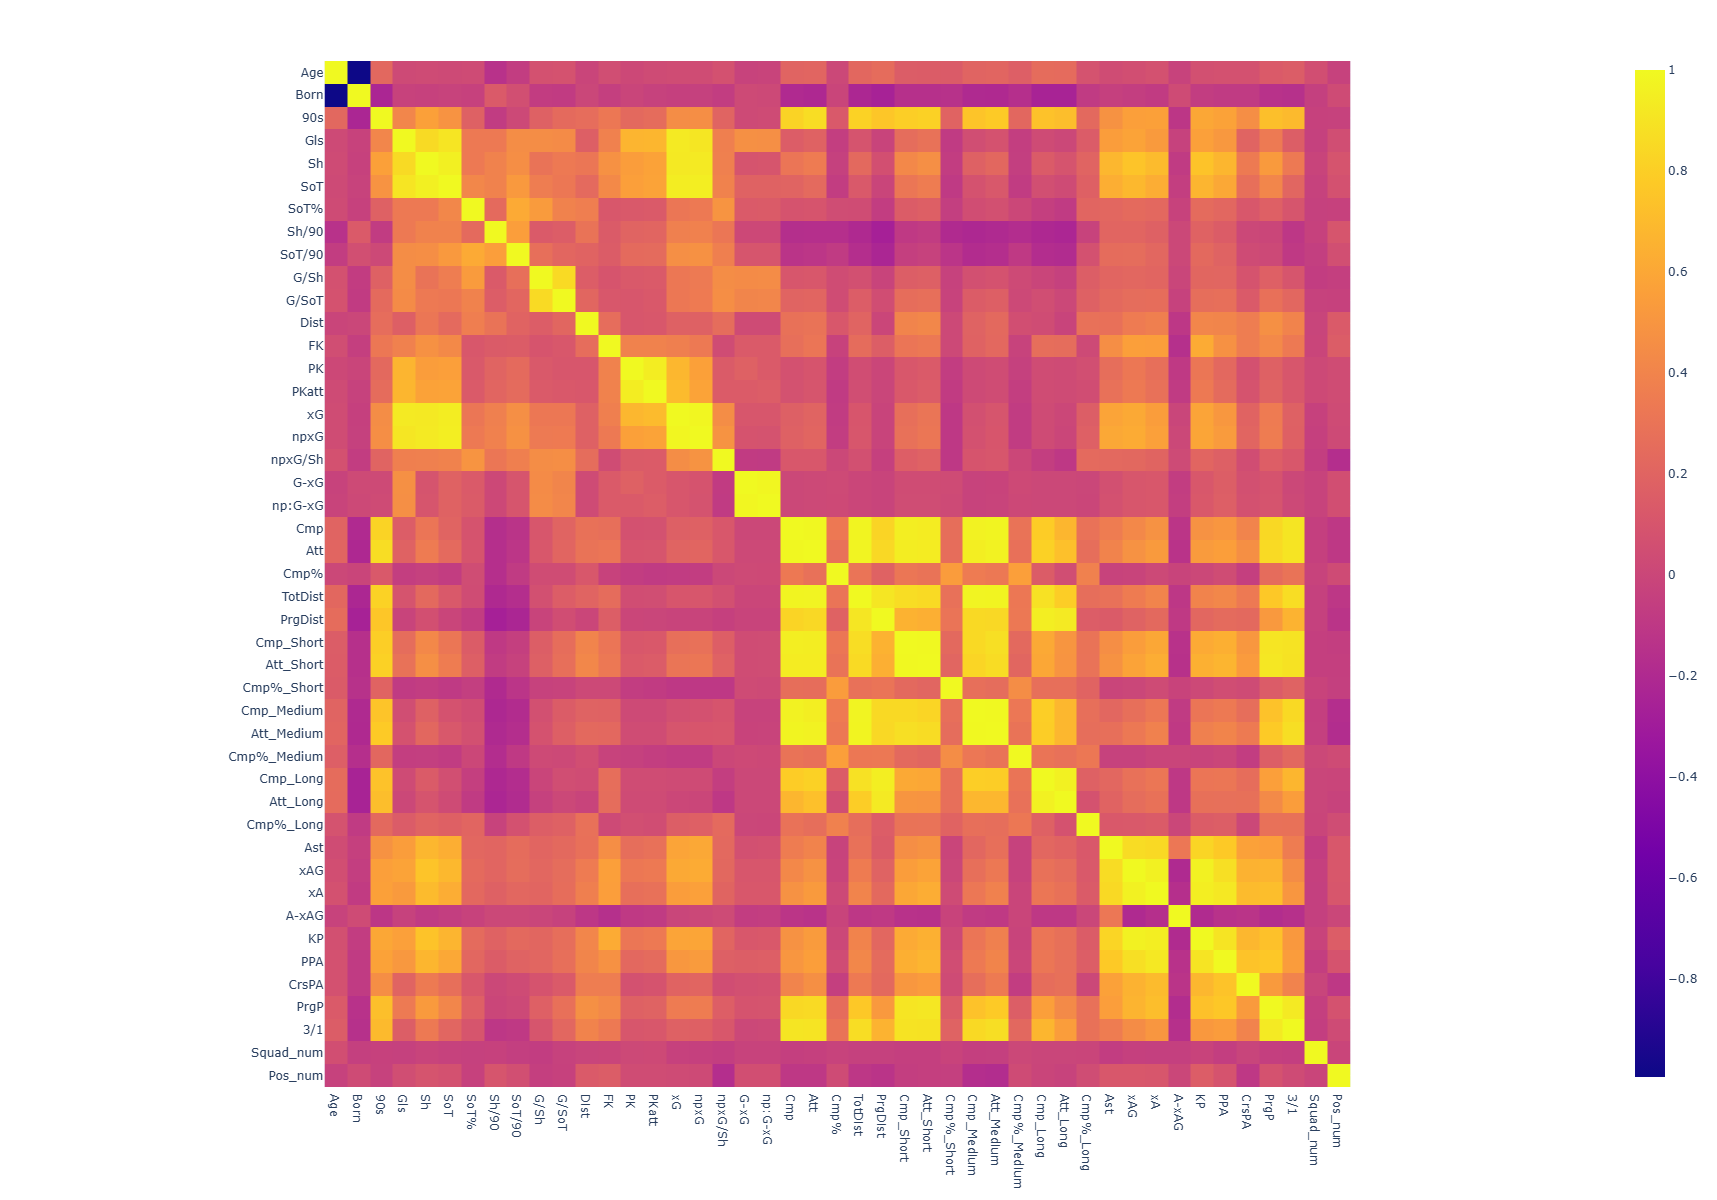

In [73]:
px.imshow(corr,height=1200)

In [74]:

x=df1.drop(["Pos_num","Squad_num","Born"],axis=1)


In [75]:
y=df1["Pos_num"]

In [78]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
# Create a Gradient Boosting classifier
rf = GradientBoostingClassifier()
#Assigns importance scores to features based on their contribution to the overall model performance.
selector = SelectFromModel(rf)
selector.fit(x, y)

selected_features = x.columns[selector.get_support()]
selected_features

Index(['90s', 'Sh/90', 'SoT/90', 'Dist', 'Cmp%', 'PrgDist', 'Cmp%_Short',
       'Cmp%_Medium', 'CrsPA', 'PrgP', '3/1'],
      dtype='object', name=0)

In [79]:
x=df1[selected_features]

In [80]:
x.describe()

0             90s       Sh/90      SoT/90        Dist        Cmp%  \
count  569.000000  569.000000  569.000000  569.000000  569.000000   
mean    14.673462    1.221652    0.371265   13.731810   76.084183   
std     11.449626    1.456984    0.547525    7.916033   12.191325   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      4.100000    0.280000    0.000000   10.000000   71.200000   
50%     12.600000    0.860000    0.200000   15.100000   78.000000   
75%     23.600000    1.810000    0.560000   19.200000   83.300000   
max     38.000000   15.000000    7.500000   34.100000  100.000000   

0           PrgDist  Cmp%_Short  Cmp%_Medium       CrsPA        PrgP  \
count    569.000000  569.000000   569.000000  569.000000  569.000000   
mean    3238.449912   85.503515    79.898243    2.537786   50.432337   
std     3955.291254   13.725573    18.622074    4.315758   55.699452   
min        0.000000    0.000000     0.000000    0.000000    0.000000   
25%      446.000000   82.600000    75.200000    0.000000    6.000000   
50%     1759.000000   87.500000    83.300000    1.000000   32.000000   
75%     4354.000000   91.700000    90.800000    3.000000   79.000000   
max    26954.000000  100.000000   100.000000   28.000000  266.000000   

0             3/1  
count  569.000000  
mean    40.442882  
std     47.773165  
min      0.000000  
25%      6.000000  
50%     23.000000  
75%     59.000000  
max    265.000000

In [81]:
df_Model[df_Model["Pos"]=="GK"]

0               Player   Nation Pos            Squad  Age  Born   90s  Gls  \
15             Alisson   br BRA  GK        Liverpool   29  1992  37.0    0   
27     Alphonse Areola   fr FRA  GK         West Ham   29  1993   3.4    0   
31   Kepa Arrizabalaga   es ESP  GK          Chelsea   27  1994  28.5    0   
48        Gavin Bazunu   ie IRL  GK      Southampton   20  2002  32.0    0   
53       Asmir Begović   ba BIH  GK          Everton   35  1987   1.0    0   
57      Daniel Bentley  eng ENG  GK           Wolves   29  1993   2.0    0   
147    Martin Dúbravka   sk SVK  GK    Newcastle Utd   33  1989   1.7    0   
152            Ederson   br BRA  GK  Manchester City   28  1993  35.0    0   
165   Łukasz Fabiański   pl POL  GK         West Ham   37  1985  34.6    0   
180     Fraser Forster  eng ENG  GK        Tottenham   34  1988  13.5    0   
191       David de Gea   es ESP  GK   Manchester Utd   31  1990  38.0    0   
210     Vicente Guaita   es ESP  GK   Crystal Palace   35  1987  27.0    0   
223     Dean Henderson  eng ENG  GK  Nott'ham Forest   25  1997  18.0    0   
225    Wayne Hennessey  wls WAL  GK  Nott'ham Forest   35  1987   3.0    0   
240     Daniel Iversen   dk DEN  GK   Leicester City   25  1997  12.0    0   
253      Sam Johnstone  eng ENG  GK   Crystal Palace   29  1993   9.0    0   
270  Caoimhín Kelleher   ie IRL  GK        Liverpool   23  1998   1.0    0   
295         Bernd Leno   de GER  GK           Fulham   30  1992  36.0    0   
304        Hugo Lloris   fr FRA  GK        Tottenham   35  1986  24.5    0   
329  Emiliano Martínez   ar ARG  GK      Aston Villa   29  1992  34.9    0   
338      Alex McCarthy  eng ENG  GK      Southampton   32  1989   6.0    0   
345      Edouard Mendy   sn SEN  GK          Chelsea   30  1992   9.5    0   
348      Illan Meslier   fr FRA  GK     Leeds United   22  2000  34.0    0   
369       Keylor Navas   cr CRC  GK  Nott'ham Forest   35  1986  17.0    0   
372               Neto   br BRA  GK      Bournemouth   33  1989  26.5    0   
385        Robin Olsen   se SWE  GK      Aston Villa   32  1990   3.1    0   
391      Stefan Ortega   de GER  GK  Manchester City   29  1992   3.0    0   
412    Jordan Pickford  eng ENG  GK          Everton   28  1994  37.0    0   
415          Nick Pope  eng ENG  GK    Newcastle Utd   30  1992  36.2    0   
420     Aaron Ramsdale  eng ENG  GK          Arsenal   24  1998  38.0    0   
423         David Raya   es ESP  GK        Brentford   26  1995  38.0    0   
435        Joel Robles   es ESP  GK     Leeds United   32  1990   4.0    0   
437        Marek Rodák   sk SVK  GK           Fulham   25  1996   2.0    0   
448            José Sá   pt POR  GK           Wolves   29  1993  36.0    0   
458     Robert Sánchez   es ESP  GK         Brighton   24  1997  23.0    0   
494       Jason Steele  eng ENG  GK         Brighton   31  1990  15.0    0   
519       Mark Travers   ie IRL  GK      Bournemouth   23  1999  11.5    0   
538         Danny Ward  wls WAL  GK   Leicester City   29  1993  26.0    0   
547   Joseph Whitworth  eng ENG  GK   Crystal Palace   18  2004   2.0    0   

0    Sh  SoT   SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK  PKatt   xG  \
15    0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
27    0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
31    0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
48    0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
53    0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
57    0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
147   0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
152   0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
165   0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
180   0    0    0.0   0.00    0.00   0.0    0.0   0.0   0   0      0  0.0   
191   0    0    0.0   0.00    0.

In [82]:
df.loc[15]

0
Player           Alisson
Nation            br BRA
Pos                   GK
Squad          Liverpool
Age                   29
Born                1992
90s                 37.0
Gls                    0
Sh                     0
SoT                    0
SoT%                 0.0
Sh/90                0.0
SoT/90               0.0
G/Sh                 0.0
G/SoT                0.0
Dist                 0.0
FK                     0
PK                     0
PKatt                  0
xG                   0.0
npxG                 0.0
npxG/Sh              0.0
G-xG                 0.0
np:G-xG              0.0
Cmp                 1241
Att                 1453
Cmp%                85.4
TotDist            29043
PrgDist            18696
Cmp_Short            307
Att_Short            309
Cmp%_Short          99.4
Cmp_Medium           657
Att_Medium           666
Cmp%_Medium         98.6
Cmp_Long             273
Att_Long             469
Cmp%_Long           58.2
Ast                    1
xAG                  0.

In [83]:
df

0                 Player   Nation    Pos         Squad  Age  Born   90s  Gls  \
0       Brenden Aaronson   us USA  MF,FW  Leeds United   21  2000  26.4    1   
1          George Abbott  eng ENG     MF     Tottenham   16  2005   0.0    0   
2              Che Adams  sct SCO     FW   Southampton   26  1996  22.1    5   
3            Tyler Adams   us USA     MF  Leeds United   23  1999  24.0    0   
4       Tosin Adarabioyo  eng ENG     DF        Fulham   24  1997  23.2    1   
..                   ...      ...    ...           ...  ...   ...   ...  ...   
586        Jordan Zemura   zw ZIM     DF   Bournemouth   22  1999  16.2    0   
587  Oleksandr Zinchenko   ua UKR     DF       Arsenal   25  1996  23.5    1   
588         Hakim Ziyech   ma MAR  FW,MF       Chelsea   29  1993   7.3    0   
589           Kurt Zouma   fr FRA     DF      West Ham   27  1994  22.1    2   
590      Martin Ødegaard   no NOR     MF       Arsenal   23  1998  34.7   15   

0    Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK  PKatt    xG  \
0    41    9  22.0   1.56    0.34  0.02   0.11  18.4   2   0      0   3.9   
1     0    0   0.0   0.00    0.00  0.00   0.00   0.0   0   0      0   0.0   
2    47   14  29.8   2.12    0.63  0.11   0.36  13.8   0   0      0   6.7   
3     4    0   0.0   0.17    0.00  0.00   0.00  27.5   0   0      0   0.1   
4    16    4  25.0   0.69    0.17  0.06   0.25  21.2   1   0      0   0.7   
..   ..  ...   ...    ...     ...   ...    ...   ...  ..  ..    ...   ...   
586   4    0   0.0   0.25    0.00  0.00   0.00  12.9   0   0      0   0.4   
587  28    7  25.0   1.19    0.30  0.04   0.14  22.7   0   0      0   1.4   
588  16    3  18.8   2.18    0.41  0.00   0.00  22.7   0   0      0   0.6   
589  19    5  26.3   0.86    0.23  0.11   0.40  10.1   0   0      0   2.2   
590  93   31  33.3   2.68    0.89  0.16   0.48  19.2   9   0      0  10.0   

0    npxG  npxG/Sh  G-xG  np:G-xG   Cmp   Att   Cmp%  TotDist  PrgDist  \
0     3.9     0.09  -2.9     -2.9   592   797   74.3     7577     2182   
1     0.0     0.00   0.0      0.0     1     1  100.0        8        0   
2     6.7     0.14  -1.7     -1.7   330   498   66.3     4651     1042   
3     0.1     0.03  -0.1     -0.1  1108  1343   82.5    16592     5061   
4     0.7     0.04   0.3      0.3  1066  1300   82.0    22623     8478   
..    ...      ...   ...      ...   ...   ...    ...      ...      ...   
586   0.4     0.10  -0.4     -0.4   423   594   71.2     6117     3247   
587   1.4     0.05  -0.4     -0.4  1652  1911   86.4    27023     7899   
588   0.6     0.04  -0.6     -0.6   258   400   64.5     4222     1570   
589   2.2     0.12  -0.2     -0.2   701   831   84.4    13480     4437   
590  10.0     0.11   5.0      5.0  1449  1804   80.3    22540     6014   

0    Cmp_Short  Att_Short  Cmp%_Short  Cmp_Medium  Att_Medium  Cmp%_Medium  \
0          346        423        81.8         150         195         76.9   
1            1          1       100.0           0           0          0.0   
2          205        278        73.7          78         118         66.1   
3          607        686        88.5         390         460         84.8   
4          265        307        86.3         653         735         88.8   
..         ...        ...         ...         ...         ...          ...   
586        242        284        85.2         133         187         71.1   
587        808        876        92.2         696         798         87.2   
588        148        169        87.6          82         133         61.7   
589        247        271        91.1         363         407         89.2   
590        759        873        86.9         518         617         84.0   

0    Cmp_Long  Att_Long  Cmp%_Long  Ast  xAG   xA  A-xAG  KP  PPA  CrsPA  \
0          25        65       38.5    3  4.2  2.6   -1.2  46   16      4   
1           0         0        0.0    0  0.0  0.0    0.0   0    0      0   
2          26        37       70.3    3  2.8  2.2    0.2  24

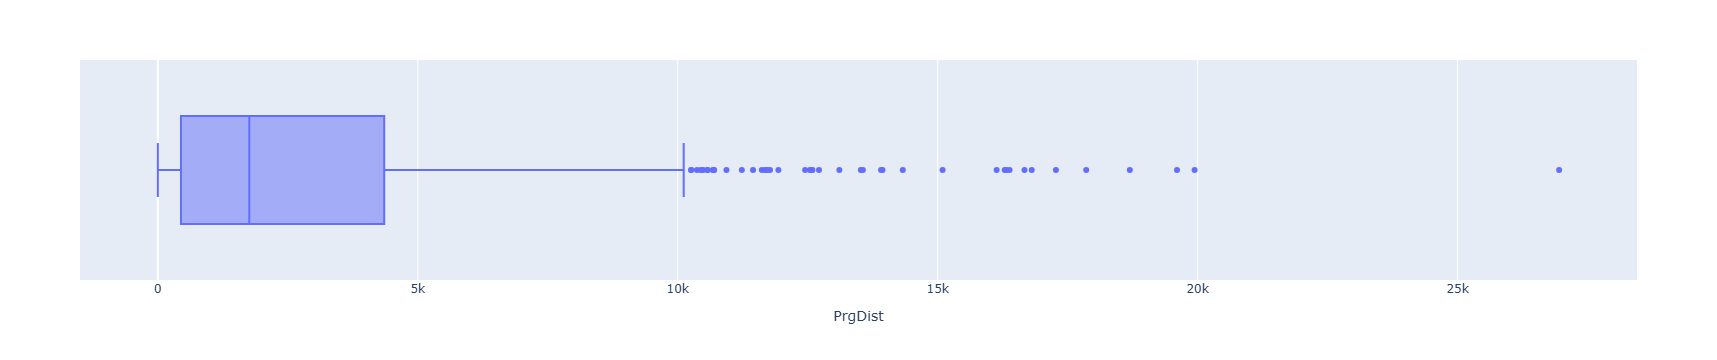

In [84]:
px.box(data_frame=x,x="PrgDist")

In [85]:
from datasist.structdata import detect_outliers

###### Drop outliers 

outlr_idx = detect_outliers(x , 0 ,["PrgDist"])

outlr_idx


[9,
 14,
 15,
 21,
 31,
 48,
 64,
 134,
 136,
 149,
 152,
 165,
 167,
 191,
 210,
 212,
 272,
 275,
 277,
 295,
 315,
 329,
 344,
 348,
 354,
 372,
 412,
 415,
 420,
 423,
 424,
 438,
 448,
 453,
 466,
 472,
 476,
 520,
 526,
 538,
 542,
 545]

In [86]:
df1.drop(outlr_idx,inplace=True)

In [87]:
selected_features

Index(['90s', 'Sh/90', 'SoT/90', 'Dist', 'Cmp%', 'PrgDist', 'Cmp%_Short',
       'Cmp%_Medium', 'CrsPA', 'PrgP', '3/1'],
      dtype='object', name=0)

In [88]:
x=df1[selected_features]

In [89]:
 df.loc[df[df["Player"]=="Emi Buendía"].index[0]]

0
Player         Emi Buendía
Nation              ar ARG
Pos                  MF,FW
Squad          Aston Villa
Age                     25
Born                  1996
90s                   26.8
Gls                      5
Sh                      49
SoT                     11
SoT%                  22.4
Sh/90                 1.83
SoT/90                0.41
G/Sh                   0.1
G/SoT                 0.45
Dist                  15.9
FK                       2
PK                       0
PKatt                    0
xG                     6.3
npxG                   6.3
npxG/Sh               0.13
G-xG                  -1.3
np:G-xG               -1.3
Cmp                    787
Att                   1020
Cmp%                  77.2
TotDist              12082
PrgDist               3091
Cmp_Short              434
Att_Short              513
Cmp%_Short            84.6
Cmp_Medium             255
Att_Medium             323
Cmp%_Medium           78.9
Cmp_Long                63
Att_Long                90

In [90]:
df[df['Player'].str.contains("salah", case=False, na=False)]

0           Player  Nation Pos      Squad  Age  Born   90s  Gls   Sh  SoT  \
470  Mohamed Salah  eg EGY  FW  Liverpool   30  1992  36.6   19  121   45   

0    SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK  PKatt    xG  npxG  \
470  37.2   3.31    1.23  0.14   0.38  15.1   2   2      4  21.6  18.5   

0    npxG/Sh  G-xG  np:G-xG  Cmp   Att  Cmp%  TotDist  PrgDist  Cmp_Short  \
470     0.15  -2.6     -1.5  902  1185  76.1    12538     3403        533   

0    Att_Short  Cmp%_Short  Cmp_Medium  Att_Medium  Cmp%_Medium  Cmp_Long  \
470        648        82.3         283         352         80.4        38   

0    Att_Long  Cmp%_Long  Ast  xAG   xA  A-xAG  KP  PPA  CrsPA  PrgP  3/1  
470        66       57.6   12  7.2  7.2    4.8  65   80      7   149   53

In [91]:
selected_features2=selected_features.insert(0,"Player")

In [92]:
x2=df[selected_features2]

In [93]:
x2

0                 Player   90s  Sh/90  SoT/90  Dist   Cmp%  PrgDist  \
0       Brenden Aaronson  26.4   1.56    0.34  18.4   74.3     2182   
1          George Abbott   0.0   0.00    0.00   0.0  100.0        0   
2              Che Adams  22.1   2.12    0.63  13.8   66.3     1042   
3            Tyler Adams  24.0   0.17    0.00  27.5   82.5     5061   
4       Tosin Adarabioyo  23.2   0.69    0.17  21.2   82.0     8478   
..                   ...   ...    ...     ...   ...    ...      ...   
586        Jordan Zemura  16.2   0.25    0.00  12.9   71.2     3247   
587  Oleksandr Zinchenko  23.5   1.19    0.30  22.7   86.4     7899   
588         Hakim Ziyech   7.3   2.18    0.41  22.7   64.5     1570   
589           Kurt Zouma  22.1   0.86    0.23  10.1   84.4     4437   
590      Martin Ødegaard  34.7   2.68    0.89  19.2   80.3     6014   

0    Cmp%_Short  Cmp%_Medium  CrsPA  PrgP  3/1  
0          81.8         76.9      4    86   47  
1         100.0          0.0      0     0    0  
2          73.7         66.1      2    34   21  
3          88.5         84.8      0   136  110  
4          86.3         88.8      0    95   96  
..          ...          ...    ...   ...  ...  
586        85.2         71.1      5    45   32  
587        92.2         87.2      4   227  201  
588        87.6         61.7      7    42   20  
589        91.1         89.2      0    31   19  
590        86.9         84.0      4   266  135  

[569 rows x 12 columns]

In [94]:
x2[x2["Player"].str.contains("saliba",case=False,na=False)]

0            Player   90s  Sh/90  SoT/90  Dist  Cmp%  PrgDist  Cmp%_Short  \
471  William Saliba  26.8   0.22    0.11  13.8  91.0    11617        93.2   

0    Cmp%_Medium  CrsPA  PrgP  3/1  
471         93.3      0    99  111

In [95]:
df[df["Player"].str.contains("sala",case=False,na=False)]

0           Player  Nation Pos      Squad  Age  Born   90s  Gls   Sh  SoT  \
470  Mohamed Salah  eg EGY  FW  Liverpool   30  1992  36.6   19  121   45   

0    SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK  PKatt    xG  npxG  \
470  37.2   3.31    1.23  0.14   0.38  15.1   2   2      4  21.6  18.5   

0    npxG/Sh  G-xG  np:G-xG  Cmp   Att  Cmp%  TotDist  PrgDist  Cmp_Short  \
470     0.15  -2.6     -1.5  902  1185  76.1    12538     3403        533   

0    Att_Short  Cmp%_Short  Cmp_Medium  Att_Medium  Cmp%_Medium  Cmp_Long  \
470        648        82.3         283         352         80.4        38   

0    Att_Long  Cmp%_Long  Ast  xAG   xA  A-xAG  KP  PPA  CrsPA  PrgP  3/1  
470        66       57.6   12  7.2  7.2    4.8  65   80      7   149   53

In [96]:
y=df1["Pos_num"]

In [97]:
x.describe()

0             90s       Sh/90      SoT/90        Dist        Cmp%  \
count  527.000000  527.000000  527.000000  527.000000  527.000000   
mean    13.224668    1.289715    0.393700   14.156926   75.820683   
std     10.558600    1.488453    0.562053    7.815145   12.321318   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.550000    0.330000    0.000000   10.850000   71.050000   
50%     11.300000    0.990000    0.220000   15.600000   77.800000   
75%     21.250000    1.900000    0.580000   19.300000   82.900000   
max     38.000000   15.000000    7.500000   34.100000  100.000000   

0           PrgDist  Cmp%_Short  Cmp%_Medium       CrsPA        PrgP  \
count    527.000000  527.000000   527.000000  527.000000  527.000000   
mean    2402.330171   84.805693    78.795825    2.550285   48.039848   
std     2540.710951   13.971491    18.858334    4.129192   52.766581   
min        0.000000    0.000000     0.000000    0.000000    0.000000   
25%      373.500000   82.400000    74.100000    0.000000    7.000000   
50%     1400.000000   87.200000    82.400000    1.000000   31.000000   
75%     3593.500000   90.900000    89.000000    4.000000   73.500000   
max    10115.000000  100.000000   100.000000   25.000000  266.000000   

0             3/1  
count  527.000000  
mean    36.324478  
std     42.669022  
min      0.000000  
25%      5.000000  
50%     21.000000  
75%     52.000000  
max    233.000000

In [98]:
import joblib

In [99]:
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [100]:
# x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=7)

In [101]:
from imblearn.over_sampling import SMOTE

`This line imports the SMOTE class from the imblearn.over_sampling module. SMOTE stands for Synthetic Minority Over-sampling Technique, which is used to address class imbalance problems in datasets.`

In [102]:
smote = SMOTE(sampling_strategy="auto",random_state=7)

In [103]:
x,y=smote.fit_resample(x,y)

In [104]:
# x_train_smote , y_train_smote = smote.fit_resample(x_train , y_train)

In [105]:
joblib.dump(smote , "smote.pkl")

['smote.pkl']

In [106]:
from sklearn.preprocessing import  StandardScaler


sclr = StandardScaler()

x = sclr.fit_transform(x)



In [107]:
# from sklearn.preprocessing import  StandardScaler


# sclr = StandardScaler()

# x = sclr.fit_transform(x)

# x_test = sclr.transform(x_test)

In [108]:
joblib.dump(sclr , "Scaler.pkl")

['Scaler.pkl']

In [109]:
model = LogisticRegression(multi_class="ovr" , C = 20)

In [110]:
model.fit(x,y)

LogisticRegression(C=20, multi_class='ovr')

In [111]:
joblib.dump(model , "Model.pkl")

['Model.pkl']

In [112]:
# y_train_pred = model.predict(x_train_smote)
# y_test_pred = model.predict(x_test)

In [113]:
# print(f"Train Acc is {accuracy_score(y_true=y_train_smote , y_pred = y_train_pred)}")
# print(f"Test Acc is {accuracy_score(y_true=y_test , y_pred = y_test_pred)}")

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score
model = KNeighborsRegressor(n_neighbors = 5  , metric="minkowski")
model.fit(x_train_smote ,y_train_smote)
y_train_pred = model.predict(x_train_smote)
y_test_pred = model.predict(x_test)

print(100*"*")
print(f"Train Accuracy is in accuracy {r2_score(y_true=y_train_smote , y_pred=y_train_pred)}")
print(f"Test Accuracy is in accuracy {r2_score(y_true=y_test , y_pred=y_test_pred)}")
print(100*"*")
print(f"Train mean squared error {mean_squared_error(y_true=y_train_smote , y_pred=y_train_pred)}")
print(f"Test mean squared error {mean_squared_error(y_true=y_test , y_pred=y_test_pred)}")


x1= sclr.fit_transform(x)

x1,y1=smote.fit_resample(x,y)

model1 = DecisionTreeClassifier(max_depth=3 , min_samples_leaf=20,criterion="entropy")

In [114]:
res = cross_validate(model ,x  ,y , cv = 5 , scoring = "accuracy" , return_train_score=True,return_estimator=True)

In [115]:
joblib.dump(res , "Res.pkl")

['Res.pkl']

In [116]:
res['train_score'].mean()

0.8494324981419196

In [117]:
res['test_score'].mean()

0.8324316109422492

_______________________________________________________________________________________________________________________________________________

In [118]:
# x.describe()

In [119]:
%%writefile position_selection.py

import streamlit as st
import joblib
import pandas as pd

scaler = joblib.load( "Scaler.pkl")
res = joblib.load( "res.pkl")
model  = joblib.load( "Model.pkl")
Inputs = joblib.load( "Inputs.pkl")
Smote = joblib.load("smote.pkl")

### Abtedy adef el variables elly bt2asar 3ala el predection
def Prediction(A,B,C, Dist, D, PrgDist, E,F, CrsPA, PrgP, G): ###Ba3mel data frame bel columns elly 3andy we ashof btebtedy mn 3and kam we asameha
    df = pd.DataFrame(columns= ['90s', 'Sh/90', 'SoT/90', 'Dist', 'Cmp%', 'PrgDist', 'Cmp%_Short','Cmp%_Medium', 'CrsPA', 'PrgP', '3/1'])
    df.at[0,"90s"]= A
    df.at[0,"Sh/90"]= B
    df.at[0,"SoT/90"]= C
    df.at[0,"Dist"]= Dist
    df.at[0,"Cmp%"]= D
    df.at[0,"PrgDist"]= PrgDist
    df.at[0,"Cmp%_Short"]= E
    df.at[0,"Cmp%_Medium"]= F
    df.at[0,"CrsPA"]= CrsPA
    df.at[0,"PrgP"]= PrgP
    df.at[0,"3/1"]= G
 
    df= scaler.transform(df)
       
    result = model.predict(df)
    return result[0]

###ba3mel hena design el shakl bta3y
def Main():

    A= st.slider( "Match Played",min_value= 0 , max_value=38 , step= 1 , value=25)
    B= st.slider("Shots in Match",min_value= 0 , max_value=15 , step= 1 , value=5)
    C = st.slider("Shots on target per Match",min_value= 0 , max_value=15 , step= 1 , value=5)
    Dist = st.slider("Average distance, in yards, from goal of all shots taken",min_value= 0 , max_value=35 , step= 1 , value=5)
    D= st.slider("Pass Completion Percentage",min_value= 0 , max_value=100 , step= 1 , value=5)
    PrgDist = st.slider("Progressive Passes",min_value= 0 , max_value=15000 , step= 1 , value=5)
    E = st.slider("Pass Completion % Short",min_value= 0 , max_value=100 , step= 1 , value=5)
    F = st.slider("Pass Completion % Medium",min_value= 0 , max_value=100 , step= 1 , value=5)
    CrsPA = st.slider("Crosses into Penalty Area",min_value= 0 , max_value=25 , step= 1 , value=5)
    PrgP = st.slider("Progressive Passes",min_value= 0 , max_value=270 , step= 1 , value=5)
    G= st.slider("Passes into Final Third",min_value= 0 , max_value=240 , step= 1 , value=5)
    if st.button("Predict"):
        result = Prediction(A,B,C, Dist, D, PrgDist, E,F, CrsPA, PrgP, G)
        if result==0:
            st.text(f"You most probably a DF")
        elif result==1:
            st.text(f"You most probably a FW")
        elif result==2:
            st.text(f"You most probably a GK")
        elif result==3:
            st.text(f"You most probably a MF")
        

    

Main()


Overwriting position_selection.py


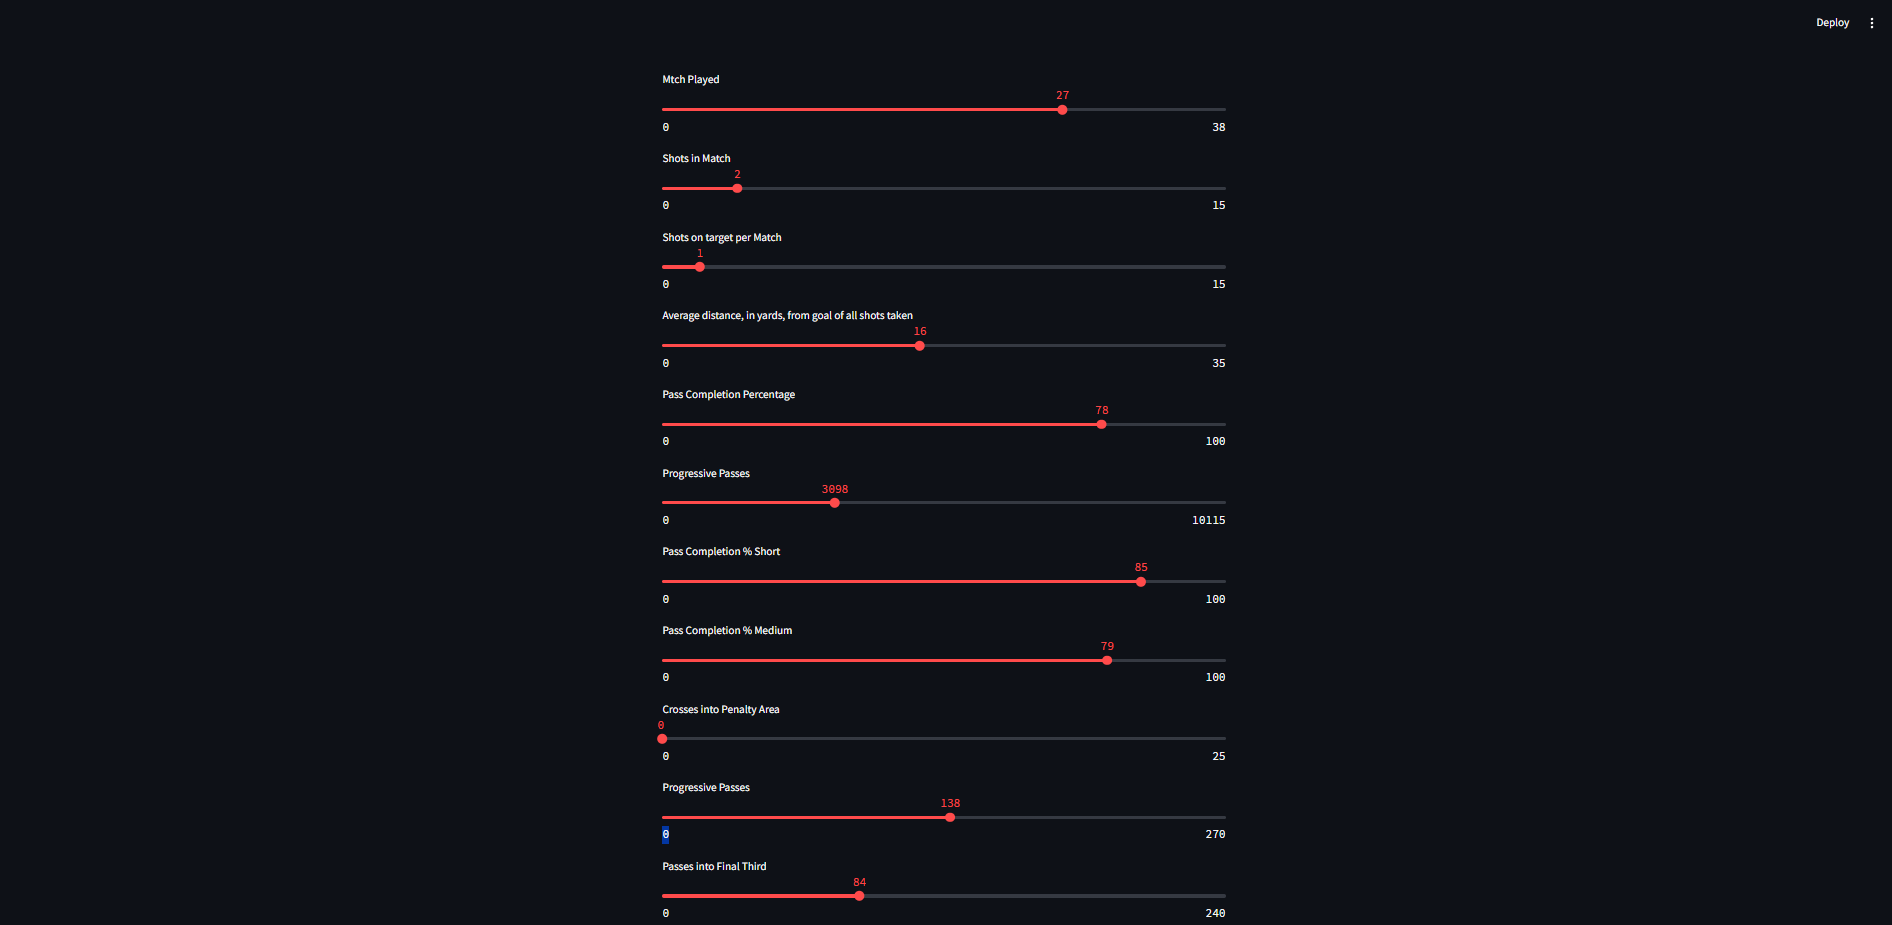

In [1]:
%%writefile position_selection2.py

import streamlit as st
import joblib
import pandas as pd

# Load models and scaler
scaler = joblib.load("Scaler.pkl")
model = joblib.load("Model.pkl")

# Function to create a DataFrame for prediction
def Prediction(A, B, C, Dist, D, PrgDist, E, F, CrsPA, PrgP, G):
    df = pd.DataFrame(columns=['90s', 'Sh/90', 'SoT/90', 'Dist', 'Cmp%', 
                               'PrgDist', 'Cmp%_Short', 'Cmp%_Medium', 
                               'CrsPA', 'PrgP', '3/1'])
    df.at[0, "90s"] = A
    df.at[0, "Sh/90"] = B
    df.at[0, "SoT/90"] = C
    df.at[0, "Dist"] = Dist
    df.at[0, "Cmp%"] = D
    df.at[0, "PrgDist"] = PrgDist
    df.at[0, "Cmp%_Short"] = E
    df.at[0, "Cmp%_Medium"] = F
    df.at[0, "CrsPA"] = CrsPA
    df.at[0, "PrgP"] = PrgP
    df.at[0, "3/1"] = G

    df = scaler.transform(df)
    result = model.predict(df)
    return result[0]

# Main function to build the UI
def Main():
    st.sidebar.title("Premier League Season 22/23 ")
    st.sidebar.title("Stats For Team ")
    
    # Sidebar selection
    option = st.sidebar.selectbox("Select an Option", ["Predict Player Position", "About"])
    
    if option == "Predict Player Position":
        st.title("Player Position Prediction")
        st.write("Select the inputs to predict the player position.")

        # User input sliders
        A = st.number_input("Match Played", min_value=0, max_value=38, step=1, value=25)
        B = st.number_input("Shots in Match", min_value=0, max_value=15, step=1, value=5)
        C = st.number_input("Shots on Target per Match", min_value=0, max_value=15, step=1, value=5)
        Dist = st.number_input("Average Distance of Shots (yards)", min_value=0, max_value=35, step=1, value=5)
        D = st.number_input("Pass Completion Percentage", min_value=0, max_value=100, step=1, value=75)
        PrgDist =st.number_input("Progressive Passes"   , min_value=0, max_value=15000, step=1)
        E = st.number_input("Pass Completion % Short", min_value=0, max_value=100, step=1, value=75)
        F = st.number_input("Pass Completion % Medium", min_value=0, max_value=100, step=1, value=75)
        CrsPA = st.number_input("Crosses into Penalty Area", min_value=0, max_value=25, step=1, value=5)
        PrgP = st.number_input("Progressive Passes (Another Metric)", min_value=0, max_value=270, step=1, value=5)
        G = st.number_input("Passes into Final Third", min_value=0, max_value=240, step=1, value=5)

        if st.button("Predict"):
            result = Prediction(A, B, C, Dist, D, PrgDist, E, F, CrsPA, PrgP, G)
            position_map = {0: "DF", 1: "FW", 2: "GK", 3: "MF"}
            st.text(f"You most probably play as a {position_map[result]}.")

    elif option == "About":
        st.title("About This App")
        st.write("This application predicts the player's position based on various metrics.")
        st.write("Input the statistics of a player, and the model will suggest the most likely position they play.")
        st.write("Developed using Streamlit and machine learning models.")

# Run the main function
if __name__ == "__main__":
    Main()


Overwriting position_selection2.py
